## Extension - Health impact of wildfire smokes

There has been an alarming rate of increase in the frequency and severity of wildfires in the U.S. This has made us all realize that there is a pressing need to understand their broader impacts on community health, especially in urban areas where people may face health risks due to dense populations and limited mitigation options. Wildfire smoke, which releases harmful pollutants like carbon monoxide (CO), particulate matter, and smoke compounds, degrades air quality, leading to respiratory and cardiovascular health issues in humans.

The motivation behind this analysis is that by finding out more about these patterns between wildfires and their resultant health conditions, we could make informed decisions for emergencies, health aid allocation, and public health announcements during wildfire events. By finding patterns between mortality data and carbon monoxide exposure trends with wildfire data, the analysis seeks to provide a more nuanced view of how air quality degradation due to wildfires translates into measurable health outcomes. This could be valuable for local authorities, who could use the findings to implement more targeted interventions during wildfire episodes, and healthcare providers, who might anticipate and manage unusual increases in wildfire-related health issues.

We will focus on the healthcare section in Arlington, Texas, and its neighboring area - Tarrant County. We will specifically focus on the possible issues that could arise due to the smoke and particulate pollutants released in wildfires. This will involve deaths caused due to respiratory diseases in and around Arlington, including the whole county of Tarrant (where the city is located). Another analysis we will be doing will involve studying the relationship between people being exposed to carbon monoxide (calls made to the Texas Poison Center Network). Understanding these impacts is critical, as it highlights how wildfire smoke might cause severe health issues, which puts additional strain on healthcare systems and emergency services.


Lets start by installing and importing all the packages to load data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Note - this analysis was done in Google Colab, which is a Jupyter Notebook setup that runs in cloud. It gets the data files from your Google Drive, for which it requires the below snipped works by making the data files available in Google Drive. Change to the required path where all the data files are located. This will differ for each user.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd 'drive/MyDrive/data 512/final_project'

/content/drive/MyDrive/data 512/final_project


In [ ]:
# Read in the data for Texas deaths due to respiratory diseases from 2018 to 2022
deaths_2018_to_2022 = pd.read_csv('raw_data/2018-2022 Texas deaths due to respiratory diseases.txt', sep='\t')

# Read in the data for Texas deaths due to respiratory diseases from 1999 to 2020
deaths_1999_to_2020 = pd.read_csv('raw_data/1999-2020 Texas deaths due to respiratory diseases.txt', sep='\t')

# Read in the data for carbon monoxide poisoning calls from the Tarrant County Poison Center
co_exposure = pd.read_csv('raw_data/tarrant_co_poisoning_calls.csv')

# Read in the historic estimates of smoke exposure levels
historic_smoke_estimates = pd.read_csv('intermediate/historic_smoke_estimates.csv')

# Read in the predicted smoke exposure estimates for future analysis
predicted_smoke_estimates = pd.read_csv('intermediate/predicted_smoke_estimates.csv')

In [ ]:
deaths_1999_to_2020.head(2)

,Notes,Year,Year Code,Ten-Year Age Groups,Ten-Year Age Groups Code,Gender,Gender Code,Deaths,Population,Crude Rate
0,NaN,1999.0,1999.0,< 1 year,1,Female,F,33.0,162519.0,20.3
1,NaN,1999.0,1999.0,< 1 year,1,Male,M,37.0,169859.0,21.8


In [ ]:
deaths_2018_to_2022.head(2)

,Notes,Year,Year Code,Ten-Year Age Groups,Ten-Year Age Groups Code,Gender,Gender Code,Deaths,Population,Crude Rate
0,NaN,2018.0,2018.0,< 1 year,1,Female,F,16.0,190976.0,Unreliable
1,NaN,2018.0,2018.0,< 1 year,1,Male,M,21.0,199689.0,10.5


In [ ]:
co_exposure.head()

,year,region,population_estimate,rate,number of calls
0,2021,Tarrant,2118670.0,3.26,3.26
1,2020,Tarrant,2110640.0,2.75,2.75
2,2019,Tarrant,2060239.0,2.10,1.36
3,2018,Tarrant,2052267.0,1.88,0.78
4,2017,Tarrant,2026874.0,1.78,1.28


In [ ]:
def get_statistics_for_column(df, column_name):
    # Print the count of missing (NA) values in the specified column of the DataFrame
    print(f"NA values in '{column_name}' = {df[column_name].isna().sum()}")

    # Return the summary statistics for the specified column (e.g., count, mean, std, etc.)
    return df[column_name].describe()

In [ ]:
print(f"Number of rows in deaths_1999_to_2020: {len(deaths_1999_to_2020)}")
# print unique values in column "Year"
print(f"Unique values in column 'year': {deaths_1999_to_2020['Year'].unique()}")
# Get statistics about the deaths
get_statistics_for_column(deaths_1999_to_2020, "Deaths")

Number of rows in deaths_1999_to_2020: 533
Unique values in column 'year': [1999. 2000. 2001. 2002. 2003. 2004. 2005. 2006. 2007. 2008. 2009. 2010.
 2011. 2012. 2013. 2014. 2015. 2016. 2017. 2018. 2019. 2020.   nan]
NA values in 'Deaths' = 60


,Deaths
count,473.000000
mean,733.780127
std,976.689294
min,10.000000
25%,23.000000
50%,98.000000
75%,1504.000000
max,3159.000000


In [ ]:
print(f"Number of rows in deaths_2018_to_2022: {len(deaths_2018_to_2022)}")
# print unique values in column "Year"
print(f"Unique values in column 'year': {deaths_2018_to_2022['Year'].unique()}")
# Get statistics about the deaths
get_statistics_for_column(deaths_2018_to_2022, "Deaths")

Number of rows in deaths_2018_to_2022: 165
Unique values in column 'year': [2018. 2019. 2020. 2021. 2022.   nan]
NA values in 'Deaths' = 60


,Deaths
count,105.000000
mean,878.780952
std,1117.962888
min,10.000000
25%,23.000000
50%,115.000000
75%,2011.000000
max,3159.000000


We see that we have duplicate data from the raw export from CDC Wonder website. We fix that by dropping the years with NaN values, and only taking data for years 2018 to 2020 from a single dataset.

In [ ]:
get_statistics_for_column(co_exposure, "rate")

NA values in 'rate' = 12


,rate
count,10.000000
mean,1.907000
std,0.730708
min,0.970000
25%,1.302500
50%,1.830000
75%,2.250000
max,3.260000


## Data clean - respiratory deaths data

In this part, we will perform various data cleaning and merge steps to make sure that our data is in the required format for analysis. We will need the values for each year, and we will end up aggregating it after performing the basic cleaning steps to ensure that there is no NA/junk values in the data.


In [ ]:
# Take all rows from 'deaths_1999_to_2020' where year is less than 2018, and take all rows from 'deaths_2018_to_2022' and combine into a single df
df1 = deaths_1999_to_2020.dropna(subset=['Year'])
df1 = df1[df1['Year'] < 2018]
# print(df1['Year'].unique())
df2 = deaths_2018_to_2022.dropna(subset=['Year'])
# print(df2['Year'].unique())
deaths_1999_to_2022 = pd.concat([df1, df2])
deaths_1999_to_2022['Year'].unique()

array([1999., 2000., 2001., 2002., 2003., 2004., 2005., 2006., 2007.,
       2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015., 2016.,
       2017., 2018., 2019., 2020., 2021., 2022.])

In [ ]:
co_exposure['year'].unique()

array([2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2023,
       2022])

In [ ]:
# Drop Gender Code and Year Code from deaths_1999_to_2022
deaths_1999_to_2022 = deaths_1999_to_2022.drop(columns=['Notes', 'Gender Code', 'Year Code', 'Ten-Year Age Groups Code', 'Crude Rate'])

We will have to group the data based on Year and update the count for Deaths and Population, as they need to be aggregated on a yearly basis.

In [ ]:
# Groupby based on 'Year' and update 'Deaths' and 'Population'
deaths_1999_to_2022_only_year = deaths_1999_to_2022.groupby(['Year']).agg({'Deaths': 'sum', 'Population': 'sum'}).reset_index()
deaths_1999_to_2022_only_year.head()

,Year,Deaths,Population
0,1999.0,13535.0,19901146.0
1,2000.0,13712.0,20851820.0
2,2001.0,13953.0,21319622.0
3,2002.0,13961.0,19323813.0
4,2003.0,13733.0,22030931.0


In [ ]:
# Groupby based on 'Gender' and 'Year', and update 'Deaths' and 'Population'
deaths_1999_to_2022_gender_year = deaths_1999_to_2022.groupby(['Year', 'Gender']).agg({'Deaths': 'sum', 'Population': 'sum'}).reset_index()
deaths_1999_to_2022_gender_year.head()

,Year,Gender,Deaths,Population
0,1999.0,Female,6958.0,10360202.0
1,1999.0,Male,6577.0,9540944.0
2,2000.0,Female,7149.0,10498910.0
3,2000.0,Male,6563.0,10352910.0
4,2001.0,Female,7283.0,10731190.0


This normalization allows for a more meaningful comparison of death rates across years, as it adjusts for population size.

In [ ]:
# Normalize Deaths in deaths_1999_to_2022 - death per capita
deaths_1999_to_2022_only_year['Deaths per capita'] = deaths_1999_to_2022_only_year['Deaths'] / deaths_1999_to_2022_only_year['Population'] * 1000
deaths_1999_to_2022_only_year.head()

,Year,Deaths,Population,Deaths per capita
0,1999.0,13535.0,19901146.0,0.680112
1,2000.0,13712.0,20851820.0,0.657592
2,2001.0,13953.0,21319622.0,0.654468
3,2002.0,13961.0,19323813.0,0.722476
4,2003.0,13733.0,22030931.0,0.623351


In [ ]:
# Normalize deaths in deaths_1999_to_2022_gender_year - death per capita
deaths_1999_to_2022_gender_year['Deaths per capita'] = deaths_1999_to_2022_gender_year['Deaths'] / deaths_1999_to_2022_gender_year['Population'] * 1000
deaths_1999_to_2022_gender_year.head()

,Year,Gender,Deaths,Population,Deaths per capita
0,1999.0,Female,6958.0,10360202.0,0.671609
1,1999.0,Male,6577.0,9540944.0,0.689345
2,2000.0,Female,7149.0,10498910.0,0.680928
3,2000.0,Male,6563.0,10352910.0,0.633928
4,2001.0,Female,7283.0,10731190.0,0.678676


We will plot the output data to see if it has any pattern with our previous smoke estimates.

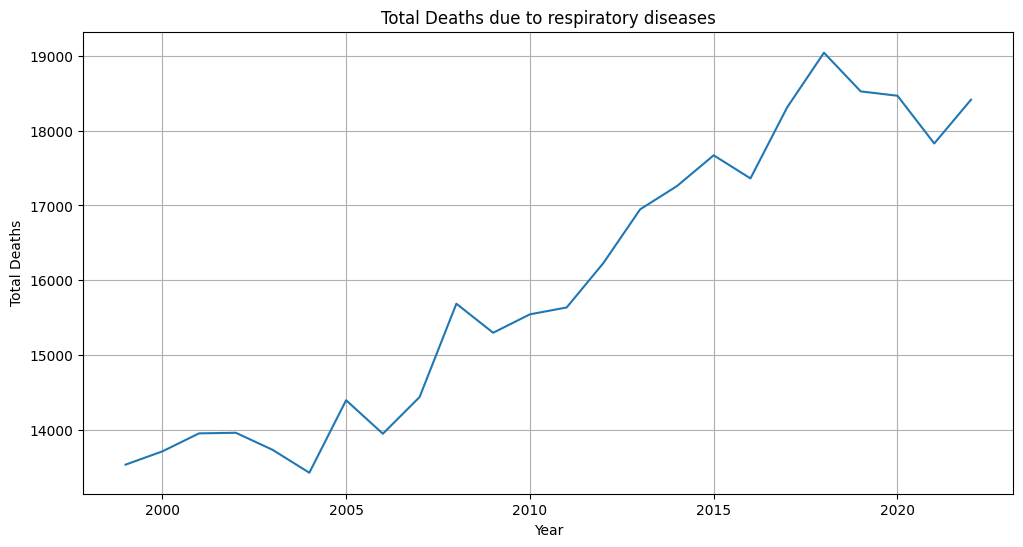

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(deaths_1999_to_2022_only_year["Year"], deaths_1999_to_2022_only_year["Deaths"])
plt.xlabel("Year")
plt.ylabel("Total Deaths")
plt.title("Total Deaths due to respiratory diseases")
plt.grid(True)
plt.show()

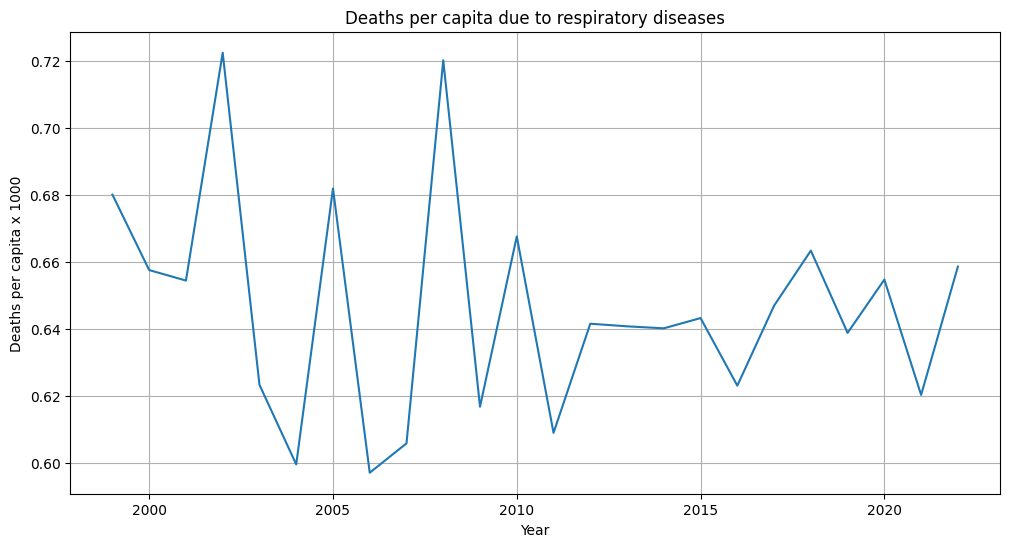

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(deaths_1999_to_2022_only_year["Year"], deaths_1999_to_2022_only_year["Deaths per capita"])
plt.xlabel("Year")
plt.ylabel("Deaths per capita x 1000")
plt.title("Deaths per capita due to respiratory diseases")
plt.grid(True)
plt.show()

We get the separate male and female datasets to understand if there's any particular demographic that is more heavily affected by the wildfire smokes.

In [ ]:
deaths_1999_to_2022_male = deaths_1999_to_2022_gender_year[deaths_1999_to_2022_gender_year["Gender"] == "Male"]
deaths_1999_to_2022_female = deaths_1999_to_2022_gender_year[deaths_1999_to_2022_gender_year["Gender"] == "Female"]

Plotting to see the trend compared to the overall deaths...

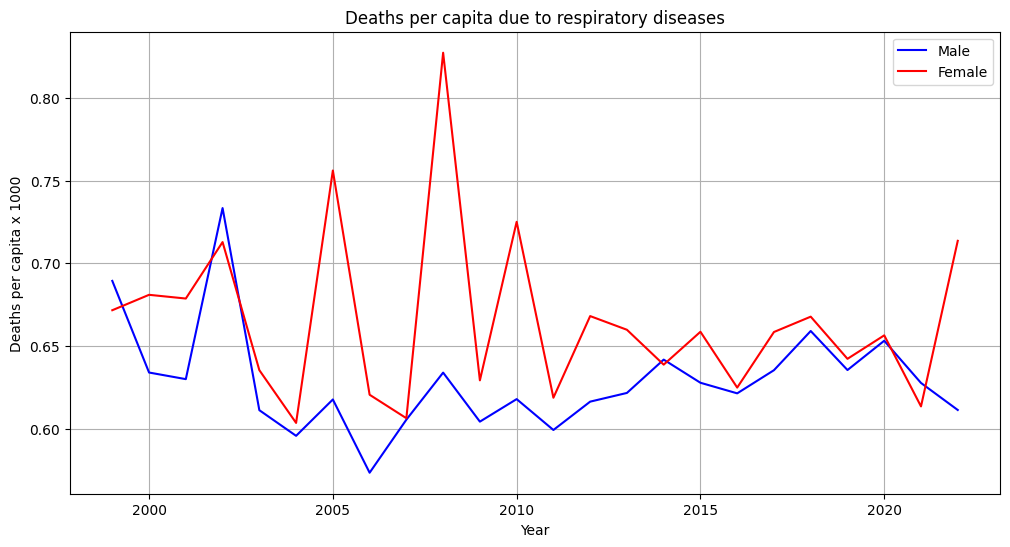

In [ ]:

plt.figure(figsize=(12, 6))
plt.plot(deaths_1999_to_2022_male["Year"], deaths_1999_to_2022_male["Deaths per capita"], color='b')
plt.plot(deaths_1999_to_2022_female["Year"], deaths_1999_to_2022_female["Deaths per capita"], color='red')
plt.xlabel("Year")
plt.ylabel("Deaths per capita x 1000")
plt.title("Deaths per capita due to respiratory diseases")
plt.legend(["Male", "Female"])
plt.grid(True)
plt.show()

## Data clean - CO Poisoning data

In this part, we will perform various data cleaning and merge steps to make sure that our CO poisoning data is in the required format for analysis. We already have the values for each year, so we will just clean and normalize the existing data and make sure there is no NA/junk values.

In [ ]:
co_exposure.columns

Index(['year', 'region', 'population_estimate', 'rate', 'number of calls'], dtype='object')

In [ ]:
# co_exposure - change column name from 'year' to 'Year'
co_exposure = co_exposure.rename(columns={'year': 'Year'})

In [ ]:
# From co_exposure, Filter out rows where county == "Tarrant" and sort based on year in ascending and create a new df named "co_exposure_tarrant"
co_exposure_tarrant = co_exposure[co_exposure["region"] == "Tarrant"].sort_values(by="Year")
co_exposure_tarrant.reset_index(drop=True, inplace=True)
# drop column "number of calls"
co_exposure_tarrant = co_exposure_tarrant.drop(columns=["number of calls"])
co_exposure_tarrant

,Year,region,population_estimate,rate
0,2012,Tarrant,1876624.0,0.97
1,2013,Tarrant,1910975.0,1.14
2,2014,Tarrant,1936494.0,1.16
3,2015,Tarrant,1960741.0,1.73
4,2016,Tarrant,1984677.0,2.30
5,2017,Tarrant,2026874.0,1.78
6,2018,Tarrant,2052267.0,1.88
7,2019,Tarrant,2060239.0,2.10
8,2020,Tarrant,2110640.0,2.75
9,2021,Tarrant,2118670.0,3.26


Normalizing the rate so that it can be compared on an equivalent scale to our smoke estimates and respiratory deaths data.

In [ ]:
# Normalise 'rate' column of co_exposure_tarrant
min_rate = co_exposure_tarrant['rate'].min()
max_rate = co_exposure_tarrant['rate'].max()

# Target range
min_target = 0.6
max_target = 0.8

# Apply min-max normalization
co_exposure_tarrant['rate'] = min_target + (co_exposure_tarrant['rate'] - min_rate) * (max_target - min_target) / (max_rate - min_rate)
co_exposure_tarrant

,Year,region,population_estimate,rate
0,2012,Tarrant,1876624.0,0.600000
1,2013,Tarrant,1910975.0,0.614847
2,2014,Tarrant,1936494.0,0.616594
3,2015,Tarrant,1960741.0,0.666376
4,2016,Tarrant,1984677.0,0.716157
5,2017,Tarrant,2026874.0,0.670742
6,2018,Tarrant,2052267.0,0.679476
7,2019,Tarrant,2060239.0,0.698690
8,2020,Tarrant,2110640.0,0.755459
9,2021,Tarrant,2118670.0,0.800000


## Smoke estimates

In the previous notebook, we processed wildfire and AQI data and derived our smoke estimates and forecasts and saved it to a file. Now, let’s retrieve this data for further analysis.

In [ ]:
smoke_estimates2 = pd.read_csv('intermediate/final_smoke_estimates.csv')

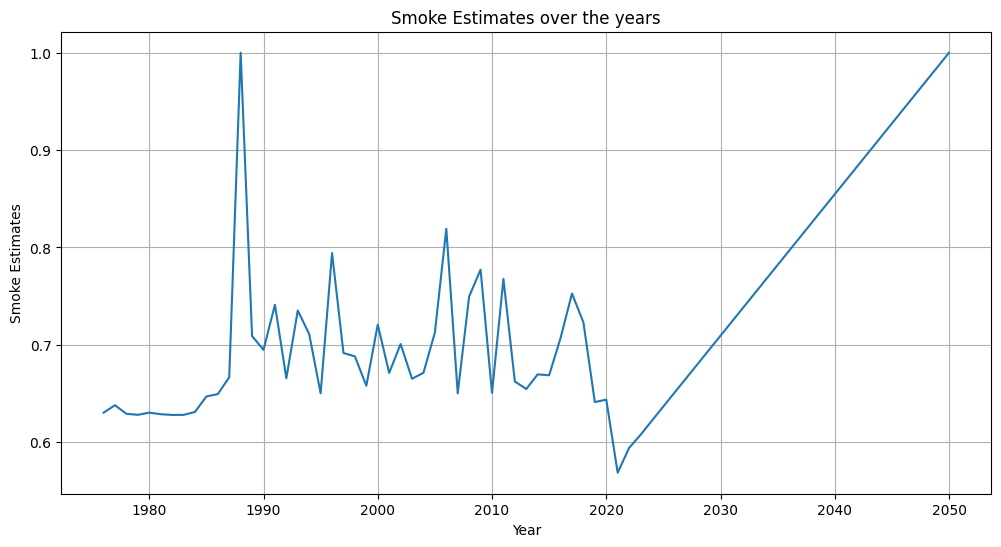

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(smoke_estimates2["Year"], smoke_estimates2["Smoke_Estimate"])
plt.xlabel("Year")
plt.ylabel("Smoke Estimates")
plt.title("Smoke Estimates over the years")
plt.grid(True)
plt.show()

## Correlation
Here, we analyze the individual variables with our smoke estimates and examine the correlations between them.


In [1]:
import scipy.stats

### Smoke estimates with respiratory deaths

There is a strong possibility of temporal dependency between smoke and health, meaning the effect of respiratory diseases might show a few months later or a year later than when the person actually is exposed to the smoke from wildfire. Here, we have found out the optimal value to be 1 based on external research, but this might change from city to city. Tweak, play around to figure it out.

In [ ]:
# In smoke_estimates2, we decrement each year by 1 and create a new df
smoke_estimates_offset = smoke_estimates2.copy()
smoke_estimates_offset['Year'] = smoke_estimates_offset['Year'] - 1
smoke_estimates_offset.head()

,Year,Smoke_Estimate
0,1975,0.630352
1,1976,0.637962
2,1977,0.629179
3,1978,0.628120
4,1979,0.630377


In [ ]:
# Get values of "Smoke_Estimate" for the rows where 2000 <= "Year" <= 2020 in smoke_estimates2
smoke_estimates2000to2020 = smoke_estimates_offset[smoke_estimates_offset["Year"] > 2000]
smoke_estimates2000to2020 = smoke_estimates2000to2020[smoke_estimates2000to2020["Year"] <= 2020]
smoke_estimates2000to2020.reset_index(drop=True, inplace=True)
smoke_estimates2000to2020

,Year,Smoke_Estimate
0,2001,0.700866
1,2002,0.665160
2,2003,0.671252
3,2004,0.712660
4,2005,0.819137
5,2006,0.650216
6,2007,0.749679
7,2008,0.777220
8,2009,0.650675
9,2010,0.767724


In [ ]:
# Get values of "Deaths per capita" for the rows where 2000 <= "Year" <= 2020 in deaths_1999_to_2022_only_year
deaths_2000_to_2020 = deaths_1999_to_2022_only_year[deaths_1999_to_2022_only_year["Year"] > 2000]
deaths_2000_to_2020 = deaths_2000_to_2020[deaths_2000_to_2020["Year"] <= 2020]
deaths_2000_to_2020.reset_index(drop=True, inplace=True)
deaths_2000_to_2020

,Year,Deaths,Population,Deaths per capita
0,2001.0,13953.0,21319622.0,0.654468
1,2002.0,13961.0,19323813.0,0.722476
2,2003.0,13733.0,22030931.0,0.623351
3,2004.0,13427.0,22394023.0,0.599580
4,2005.0,14396.0,21110664.0,0.681930
5,2006.0,13948.0,23359580.0,0.597100
6,2007.0,14439.0,23831983.0,0.605866
7,2008.0,15686.0,21779425.0,0.720221
8,2009.0,15298.0,24801761.0,0.616811
9,2010.0,15544.0,23282124.0,0.667637


We plot our output to see if our data is in sync with our smoke estimates or not.

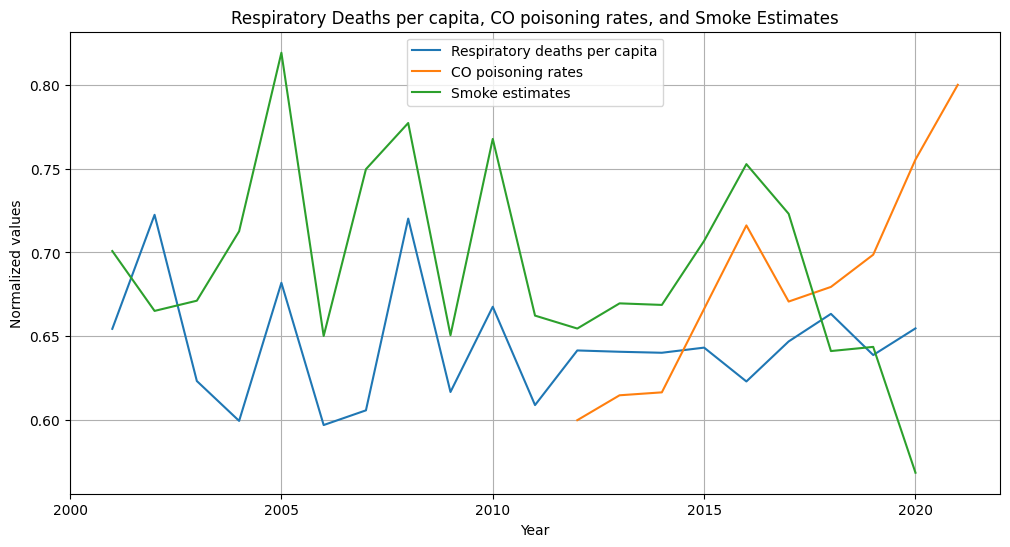

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(deaths_2000_to_2020["Year"], deaths_2000_to_2020["Deaths per capita"], label="Respiratory deaths per capita")
plt.plot(co_exposure_tarrant["Year"], co_exposure_tarrant["rate"], label="CO poisoning rates")
plt.plot(smoke_estimates2000to2020["Year"], smoke_estimates2000to2020["Smoke_Estimate"], label="Smoke estimates")
plt.xlabel("Year")
plt.ylabel("Normalized values")
plt.title("Respiratory Deaths per capita, CO poisoning rates, and Smoke Estimates")
plt.xticks(range(2000, 2021, 5))
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
correlation_coefficient1, p_value = scipy.stats.pearsonr(
    deaths_2000_to_2020['Deaths per capita'].values,
    smoke_estimates2000to2020['Smoke_Estimate'].values
)
print(f"Correlation coefficient: {correlation_coefficient1}")

Correlation coefficient: 0.2440262966815565


### Smoke estimates with male respiratory deaths

We do the same as above for the respiratory deaths data filtered to have only male entries.

In [ ]:
# Get values of "Deaths per capita" for the rows where 2000 <= "Year" <= 2020 in deaths_1999_to_2022_only_year
deaths_male_2000_to_2020 = deaths_1999_to_2022_male[deaths_1999_to_2022_male["Year"] > 2000]
deaths_male_2000_to_2020 = deaths_male_2000_to_2020[deaths_male_2000_to_2020["Year"] <= 2020]
deaths_male_2000_to_2020.reset_index(drop=True, inplace=True)
deaths_male_2000_to_2020

,Year,Gender,Deaths,Population,Deaths per capita
0,2001.0,Male,6670.0,10588432.0,0.629933
1,2002.0,Male,6651.0,9068809.0,0.733393
2,2003.0,Male,6683.0,10934978.0,0.611158
3,2004.0,Male,6621.0,11115621.0,0.595648
4,2005.0,Male,6984.0,11307684.0,0.617633
5,2006.0,Male,6644.0,11588337.0,0.573335
6,2007.0,Male,7157.0,11821411.0,0.605427
7,2008.0,Male,7644.0,12059103.0,0.633878
8,2009.0,Male,7433.0,12301611.0,0.604230
9,2010.0,Male,7706.0,12472280.0,0.617850


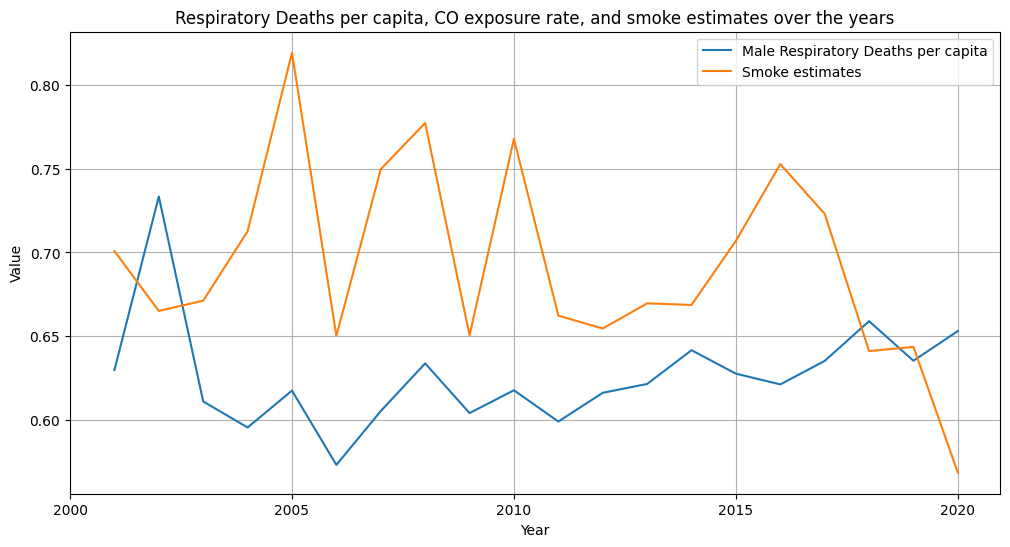

In [ ]:
# plot three lines - deaths_1999_to_2022_only_year["Deaths per capita"], co_exposure_tarrant["rate"], smoke_estimates2["Smoke_Estimate"]
plt.figure(figsize=(12, 6))
plt.plot(deaths_male_2000_to_2020["Year"], deaths_male_2000_to_2020["Deaths per capita"], label="Male Respiratory Deaths per capita")
plt.plot(smoke_estimates2000to2020["Year"], smoke_estimates2000to2020["Smoke_Estimate"], label="Smoke estimates")
plt.xlabel("Year")
plt.ylabel("Value")
plt.title("Respiratory Deaths per capita, CO exposure rate, and smoke estimates over the years")
plt.xticks(range(2000, 2021, 5))
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
correlation_coefficient2, p_value = scipy.stats.pearsonr(
    deaths_male_2000_to_2020['Deaths per capita'].values,
    smoke_estimates2000to2020['Smoke_Estimate'].values
)
print(f"Correlation coefficient: {correlation_coefficient2}")
# print(f"P-value: {p_value}")

Correlation coefficient: -0.18986408557373416


### Smoke estimates with female respiratory deaths

We do the same as above for the respiratory deaths data filtered to have only female entries.

In [ ]:
# Get values of "Deaths per capita" for the rows where 2000 <= "Year" <= 2020 in deaths_1999_to_2022_only_year
deaths_female_2000_to_2020 = deaths_1999_to_2022_female[deaths_1999_to_2022_female["Year"] > 2000]
deaths_female_2000_to_2020 = deaths_female_2000_to_2020[deaths_female_2000_to_2020["Year"] <= 2020]
deaths_female_2000_to_2020.reset_index(drop=True, inplace=True)
deaths_female_2000_to_2020

,Year,Gender,Deaths,Population,Deaths per capita
0,2001.0,Female,7283.0,10731190.0,0.678676
1,2002.0,Female,7310.0,10255004.0,0.712823
2,2003.0,Female,7050.0,11095953.0,0.635367
3,2004.0,Female,6806.0,11278402.0,0.603454
4,2005.0,Female,7412.0,9802980.0,0.756097
5,2006.0,Female,7304.0,11771243.0,0.620495
6,2007.0,Female,7282.0,12010572.0,0.606299
7,2008.0,Female,8042.0,9720322.0,0.827339
8,2009.0,Female,7865.0,12500150.0,0.629192
9,2010.0,Female,7838.0,10809844.0,0.725080


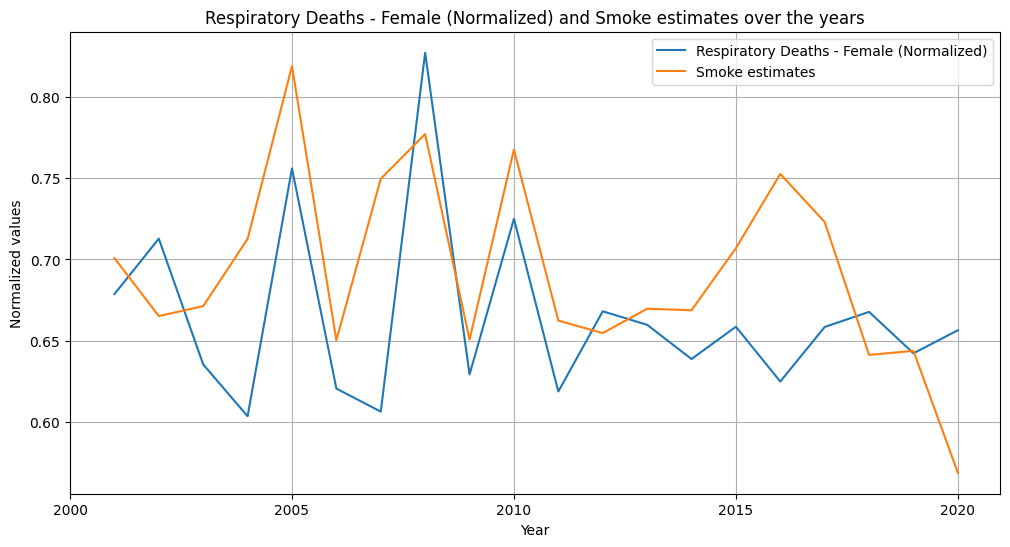

In [ ]:
# plot three lines - deaths_1999_to_2022_only_year["Deaths per capita"], co_exposure_tarrant["rate"], smoke_estimates2["Smoke_Estimate"]
plt.figure(figsize=(12, 6))
plt.plot(deaths_female_2000_to_2020["Year"], deaths_female_2000_to_2020["Deaths per capita"], label="Respiratory Deaths - Female (Normalized)")
plt.plot(smoke_estimates2000to2020["Year"], smoke_estimates2000to2020["Smoke_Estimate"], label="Smoke estimates")
plt.xlabel("Year")
plt.ylabel("Normalized values")
plt.title("Respiratory Deaths - Female (Normalized) and Smoke estimates over the years")
plt.xticks(range(2000, 2021, 5))
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
correlation_coefficient3, p_value = scipy.stats.pearsonr(
    deaths_female_2000_to_2020['Deaths per capita'].values,
    smoke_estimates2000to2020['Smoke_Estimate'].values
)
print(f"Correlation coefficient: {correlation_coefficient3}")
# print(f"P-value: {p_value}")

Correlation coefficient: 0.4782403771675354


### Smoke estimates with CO poisoning calls

The same analysis is done here on CO poisioning calls data

In [ ]:
co_exposure_tarrant111 = co_exposure_tarrant[co_exposure_tarrant["Year"] <= 2020]
co_exposure_tarrant111.reset_index(drop=True, inplace=True)
co_exposure_tarrant111

,Year,region,population_estimate,rate
0,2012,Tarrant,1876624.0,0.600000
1,2013,Tarrant,1910975.0,0.614847
2,2014,Tarrant,1936494.0,0.616594
3,2015,Tarrant,1960741.0,0.666376
4,2016,Tarrant,1984677.0,0.716157
5,2017,Tarrant,2026874.0,0.670742
6,2018,Tarrant,2052267.0,0.679476
7,2019,Tarrant,2060239.0,0.698690
8,2020,Tarrant,2110640.0,0.755459


In [ ]:
# Get values of "Smoke_Estimate" for the rows where 2000 <= "Year" <= 2020 in smoke_estimates2
smoke_estimates2012to2020 = smoke_estimates2000to2020[smoke_estimates2000to2020["Year"] > 2011]
smoke_estimates2012to2020.reset_index(drop=True, inplace=True)
smoke_estimates2012to2020

,Year,Smoke_Estimate
0,2012,0.654650
1,2013,0.669665
2,2014,0.668738
3,2015,0.706928
4,2016,0.752697
5,2017,0.723079
6,2018,0.641223
7,2019,0.643711
8,2020,0.568666


In [ ]:
correlation_coefficient4, p_value = scipy.stats.pearsonr(
    co_exposure_tarrant111['rate'].values,
    smoke_estimates2012to2020['Smoke_Estimate'].values
)
print(f"Correlation coefficient: {correlation_coefficient4}")
# print(f"P-value: {p_value}")

Correlation coefficient: -0.2176857908988906


### Correlation Heatmap
To visualize the correlation from our above steps, we plot them using a heatmap.

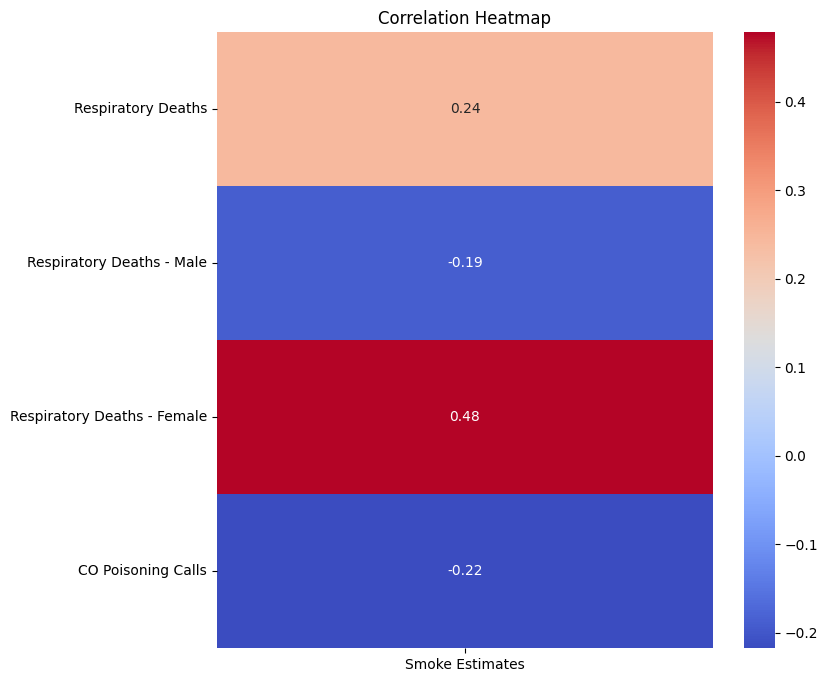

In [ ]:
# Define a dictionary to store correlation coefficients for different relationships involving smoke estimates
# Replace the correlation coefficients with actual computed values for each pair of variables
correlations = {
    "Smoke Estimates": {
        "Respiratory Deaths": correlation_coefficient1,
        "Respiratory Deaths - Male": correlation_coefficient2,
        "Respiratory Deaths - Female": correlation_coefficient3,
        "CO Poisoning Calls": correlation_coefficient4
    }
}

# Convert to df for heatmap
correlation_df = pd.DataFrame(correlations)

# Plot the heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_df, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)

plt.title("Correlation Heatmap")
plt.show()

This reveals notable patterns in the correlation between wildfire exposure and health outcomes, with demographic-level differences highlighting that certain demographic groups are more likely to have a higher level of adverse effects than others. For respiratory-related deaths, a moderate correlation of 0.24 can be seen overall, indicating a statistically significant slight link between long-term exposure to poor air quality from wildfires and increased mortality rates. Interestingly, the correlation is higher for females compared to males, suggesting that women may be more susceptible to developing respiratory complications due to wildfire smoke.

For carbon monoxide (CO) poisoning, a correlation of 0.22 was found, highlighting the short-term health risks associated with wildfires. However, plotting the data on a line chart (Figure 7) revealed an anomaly - CO poisoning calls have steadily increased since 2016, even as smoke estimates decreased during the same period. This divergence suggests that there might be factors beyond wildfire smoke that may be contributing to CO poisoning, prompting further investigation. External research points to the role of harsher winters and the increased use of unsafe indoor heating, compounded by a lack of smoke alarm mandates, as significant contributors to this rise. This is explained more in-depth in the Limitations section of the report.

## Modelling

ARIMAX (AutoRegressive Integrated Moving Average with eXogenous variables) was chosen for forecasting in this analysis because it is well-suited for time series data where past values and external factors influence future outcomes. Unlike linear regression, which assumes a direct and static relationship between variables, ARIMAX accounts for temporal dependencies by considering patterns such as trends, seasonality, and autocorrelation in the data. This is critical for accurately predicting how wildfire smoke impacts health metrics over time, as these relationships often evolve and depend on historical data.
Additionally, ARIMAX incorporates exogenous variables—factors outside the time series itself—to improve predictions. In our case, variables like smoke estimates, average wildfire distance, and GIS-derived burn areas act as predictors that influence air quality and health outcomes. While other models like machine learning-based regressions or exponential smoothing methods could be used, they either require significantly larger datasets or fail to capture the nuanced time-dependent effects as effectively as ARIMAX. Therefore, ARIMAX provides a balance of interpretability and predictive power, making it an ideal choice for this scenario where both historical trends and external variables drive the forecast.



In [2]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
# Get predicted smoke estimates
smoke_estimates_future = smoke_estimates_offset[smoke_estimates_offset["Year"] > 2020]
smoke_estimates_future.reset_index(drop=True, inplace=True)
smoke_estimates_future.head(2)

,Year,Smoke_Estimate
0,2021,0.594130
1,2022,0.607563


### Function definitions
Here, we define the modelling and visualization helper functions so that we can rerun them quickly by passing our data as parameters, reducing redundant copy paste.

In [ ]:
def model_output(exog, endog, forecastSteps, forecastExog, order=(1, 1, 1)):
    # Initialize and fit a SARIMAX (Seasonal AutoRegressive Integrated Moving Average with eXogenous regressors) model
    # exog: exogenous variables (external factors influencing the dependent variable)
    # endog: endogenous variable (the dependent time series data to model)
    # order: the (p, d, q) parameters for the ARIMA model (autoregressive, differencing, and moving average components)
    model = SARIMAX(
        exog=exog,
        endog=endog,
        order=order,
    )

    # Fit the SARIMAX model to the data
    results = model.fit()

    # Print the summary of the fitted model
    print(results.summary())

    # Generate forecasts for the specified number of future steps
    forecast = results.get_forecast(steps=forecastSteps, exog=forecastExog)

    # Extract the forecasted values
    forecast_values = forecast.predicted_mean

    # Get the 95% confidence interval for the graph
    forecast_confidence_interval = forecast.conf_int(alpha=0.05)

    predicted_df = pd.DataFrame({
        'Year': range(2020, 2049),
        'Forecast': forecast_values
    })

    return predicted_df, forecast_confidence_interval


In [ ]:
def plot_output(df1, df2, col1, col2, title, xlabelval, ylabelval, conf_int):
    plt.figure(figsize=(12, 6))

    # historic data
    plt.plot(df1[col1], df1[col2], label='Historic Data')

    # predicted data
    plt.plot(df2[col1], df2[col2], color='r', label='Predicted Data')

    # confidence interval in pink
    plt.fill_between(
        df2[col1],
        conf_int.iloc[:, 0],
        conf_int.iloc[:, 1],
        color='pink',
        alpha=0.3,
        label='95% Confidence Interval'
    )

    plt.title(title)
    plt.xlabel(xlabelval)
    plt.ylabel(ylabelval)
    plt.legend(loc="upper right", bbox_to_anchor=(1, 1))
    plt.grid(True)
    plt.show()

### Smoke estimates with respiratory deaths

In [ ]:
deaths_prediction, death_prediction_conf_int = model_output(
    exog=smoke_estimates2000to2020['Smoke_Estimate'],
    endog=deaths_2000_to_2020['Deaths per capita'],
    forecastSteps=29,
    forecastExog=smoke_estimates_future['Smoke_Estimate']
)
# deaths_prediction - change 'Forecast' to 'Deaths per capita'
deaths_prediction = deaths_prediction.rename(columns={'Forecast': 'Deaths per capita'})
deaths_prediction.head()

                               SARIMAX Results                                
Dep. Variable:      Deaths per capita   No. Observations:                   20
Model:               SARIMAX(1, 1, 1)   Log Likelihood                  36.324
Date:                Thu, 28 Nov 2024   AIC                            -64.647
Time:                        06:30:30   BIC                            -60.869
Sample:                             0   HQIC                           -64.008
                                 - 20                                         
Covariance Type:                  opg                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Smoke_Estimate     0.0598      0.258      0.232      0.817      -0.446       0.566
ar.L1             -0.2534      0.340     -0.746      0.456      -0.919       0.413
ma.L1             -0.9999    436.206

,Year,Deaths per capita
20,2020,0.633856
21,2021,0.640339
22,2022,0.639775
23,2023,0.641008
24,2024,0.641785


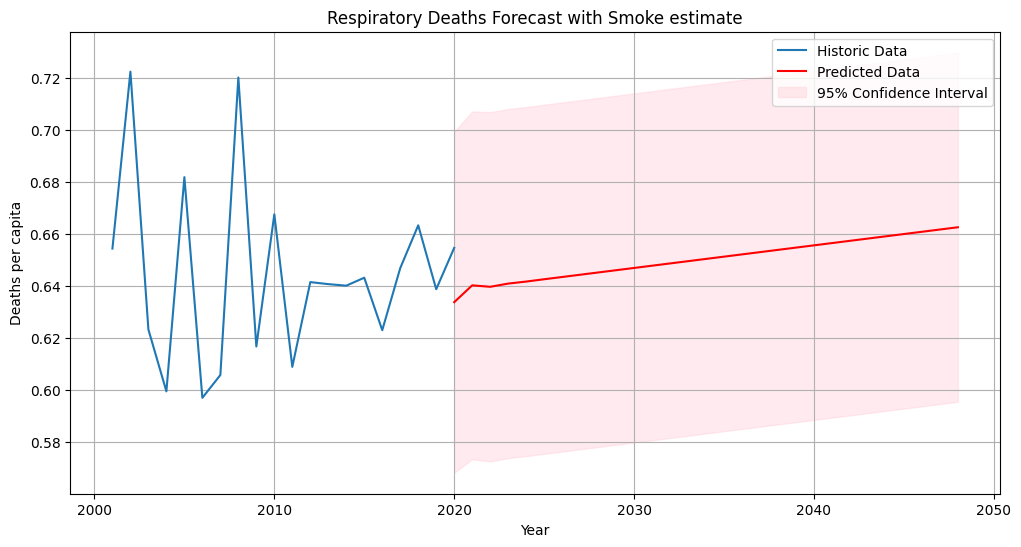

In [ ]:
plot_output(
    df1=deaths_2000_to_2020,
    df2=deaths_prediction,
    col1="Year",
    col2="Deaths per capita",
    title='Respiratory Deaths Forecast with Smoke estimate',
    xlabelval='Year',
    ylabelval='Deaths per capita',
    conf_int=death_prediction_conf_int
)

### Smoke estimates with female respiratory deaths

In [ ]:
deaths_female_prediction, death_female_prediction_conf_int = model_output(
    exog=smoke_estimates2000to2020['Smoke_Estimate'],
    endog=deaths_female_2000_to_2020['Deaths per capita'],
    forecastSteps=29,
    forecastExog=smoke_estimates_future['Smoke_Estimate'],
    order=(1,2,1)
)
# deaths_prediction - change 'Forecast' to 'Deaths per capita'
deaths_female_prediction = deaths_female_prediction.rename(columns={'Forecast': 'Deaths per capita'})
deaths_female_prediction.head()

                               SARIMAX Results                                
Dep. Variable:      Deaths per capita   No. Observations:                   20
Model:               SARIMAX(1, 2, 1)   Log Likelihood                  22.054
Date:                Thu, 28 Nov 2024   AIC                            -36.108
Time:                        06:29:57   BIC                            -32.546
Sample:                             0   HQIC                           -35.617
                                 - 20                                         
Covariance Type:                  opg                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Smoke_Estimate     0.5469      0.351      1.560      0.119      -0.140       1.234
ar.L1             -0.5293      0.455     -1.162      0.245      -1.422       0.363
ma.L1             -0.9906      9.589

,Year,Deaths per capita
20,2020,0.642181
21,2021,0.665510
22,2022,0.666137
23,2023,0.679065
24,2024,0.685453


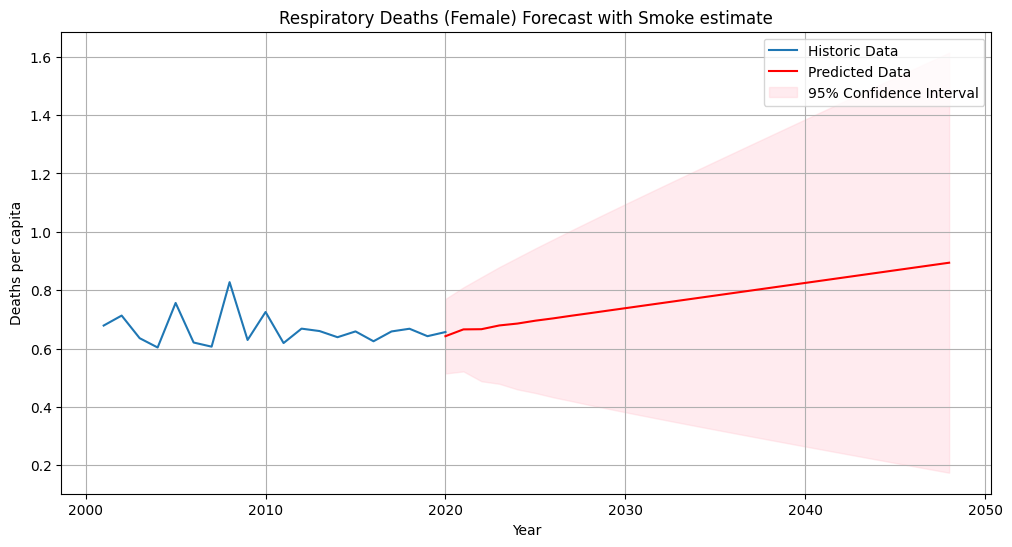

In [ ]:
plot_output(
    df1=deaths_female_2000_to_2020,
    df2=deaths_female_prediction,
    col1="Year",
    col2="Deaths per capita",
    title='Respiratory Deaths (Female) Forecast with Smoke estimate',
    xlabelval='Year',
    ylabelval='Deaths per capita',
    conf_int=death_female_prediction_conf_int
)

### Smoke estimates with CO exposure rates

In [ ]:
co_poisoning_prediction, co_poisoning_prediction_conf_int = model_output(
    exog=smoke_estimates2012to2020['Smoke_Estimate'],
    endog=co_exposure_tarrant111['rate'],
    forecastSteps=29,
    forecastExog=smoke_estimates_future['Smoke_Estimate'],
    order=(1,2,1)
)
# deaths_prediction - change 'Forecast' to 'rate'
co_poisoning_prediction = co_poisoning_prediction.rename(columns={'Forecast': 'rate'})
co_poisoning_prediction.head()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                   rate   No. Observations:                    9
Model:               SARIMAX(1, 2, 1)   Log Likelihood                  12.965
Date:                Thu, 28 Nov 2024   AIC                            -17.930
Time:                        06:29:29   BIC                            -18.146
Sample:                             0   HQIC                           -20.604
                                  - 9                                         
Covariance Type:                  opg                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Smoke_Estimate     0.1838      0.296      0.621      0.535      -0.396       0.764
ar.L1             -0.0980      1.832     -0.053      0.957      -3.689       3.493
ma.L1             -0.9547     13.497

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


,Year,rate
9,2020,0.776464
10,2021,0.800572
11,2022,0.824382
12,2023,0.848220
13,2024,0.872056


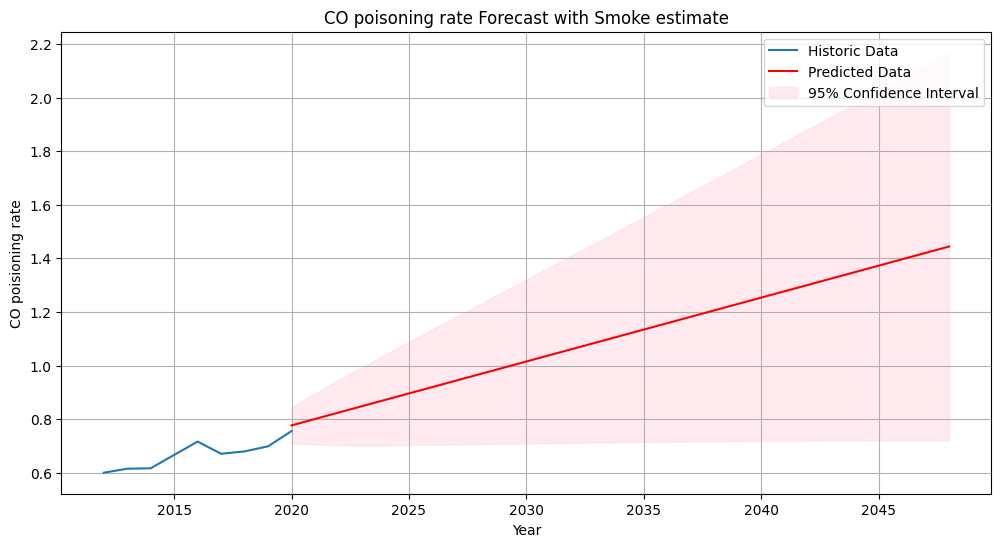

In [ ]:
plot_output(
    df1=co_exposure_tarrant111,
    df2=co_poisoning_prediction,
    col1="Year",
    col2="rate",
    title='CO poisoning rate Forecast with Smoke estimate',
    xlabelval='Year',
    ylabelval='CO poisioning rate',
    conf_int=co_poisoning_prediction_conf_int
)

## Findings


Looking to the future , projections indicate that health impacts from wildfires are likely to worsen if current trends persist. The blue line represents past data, showing how each health-related fatality has changed/increased over the years. The red line shows the forecast, predicting a steady rise in fatality for all 3 health-related issues from 2020 to 2050. The pink shaded area represents the confidence interval, which shows the range where actual fatality in the health issues is expected to fall. The wider this area, the less certain the model is about its predictions, which is normal for statistical forecasts.

With increasing wildfire activity due to climate change and other contributing factors, the burden of respiratory diseases and CO poisoning could grow, especially among vulnerable populations. This highlights the urgency of implementing preventive measures, such as improved air quality monitoring, public education campaigns, and policies to mitigate the health effects of both wildfires and other confounding influences.

Overall, the findings emphasize the multifaceted nature of wildfire-related health impacts and the importance of considering both direct and indirect factors in future research and policy-making. Addressing these challenges requires a comprehensive approach that integrates environmental, health, and socioeconomic data to better protect communities from the growing threat of wildfires.

For in-depth details on Findings, Discussion and Limitations, see the report in the repository.
